# Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
tf.__version__

'2.3.0'

# Creating dataset

In [3]:
from sklearn.datasets import make_circles

In [4]:
n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)
# X : x, y coordinates of points
# y : labels (0, 1)

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

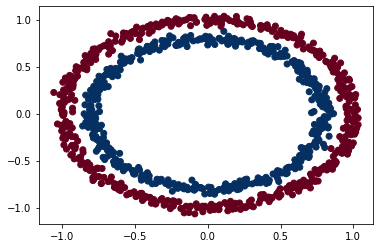

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.show()

# Input, output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [9]:
X_train.shape, X_test.shape

((800, 2), (200, 2))

# Creating the model

In [10]:
tf.random.set_seed(42)

In [11]:
classifier = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(2),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
    ]
)

In [12]:
classifier.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.02),
    metrics = ['accuracy']
)

In [13]:
# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr)

In [14]:
history = classifier.fit(X_train, y_train, epochs=10, verbose=1, callbacks=[lr_scheduler])

Epoch 1/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/10
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/10
25/25 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.9500


In [15]:
classifier.predict([[0, 0]])

array([[0.9990853]], dtype=float32)

In [16]:
classifier.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9800


[0.22279541194438934, 0.9800000190734863]

In [17]:
pd.DataFrame(history.history)

,loss,accuracy,lr
0,0.683701,0.56000,0.02
1,0.674350,0.57500,0.02
2,0.662632,0.58750,0.02
3,0.633240,0.63875,0.02
4,0.583015,0.75625,0.02
5,0.490740,0.83125,0.02
6,0.425059,0.84500,0.02
7,0.359559,0.88750,0.02
8,0.315244,0.91000,0.02
9,0.251176,0.95000,0.02


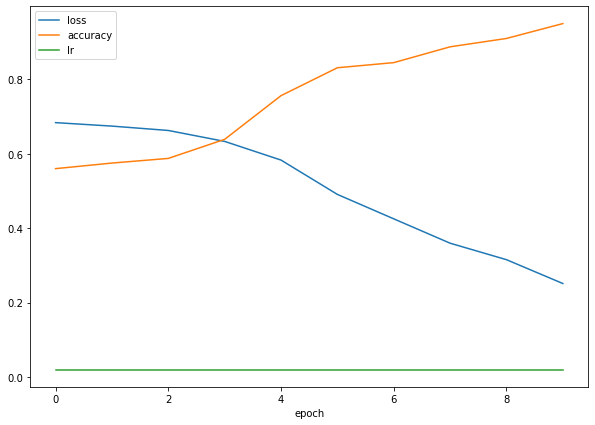

In [18]:
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epoch')
plt.show()

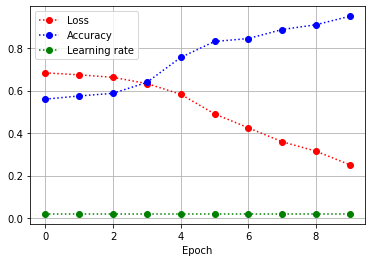

In [19]:
plt.plot(history.epoch, history.history['loss'], 'ro:', label='Loss')
plt.plot(history.epoch, history.history['accuracy'], 'bo:', label='Accuracy')
plt.plot(history.epoch, history.history['lr'], 'go:', label='Learning rate')
plt.grid()
plt.xlabel('Epoch')
plt.legend()
plt.show()

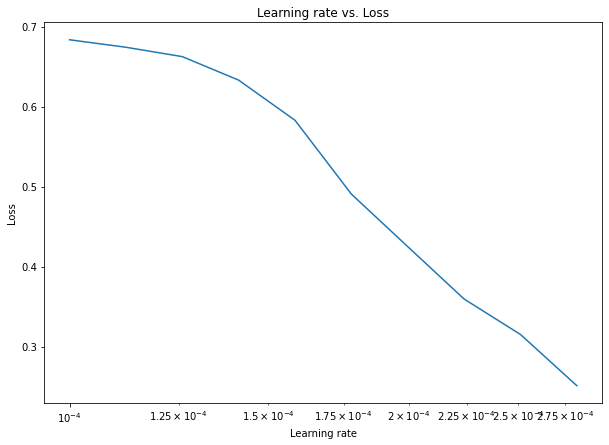

In [20]:
lrs =  1e-4 * 10**(tf.range(10)/20)

fig = plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')
plt.show()

In [21]:

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb 
    """
    
    steps = 100

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                        np.linspace(y_min, y_max, steps))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

doing binary classification
doing binary classification


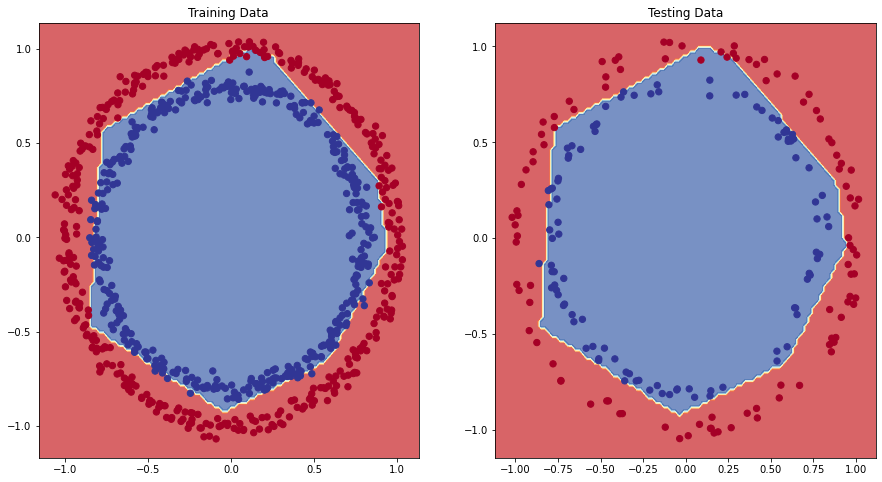

In [22]:
fig = plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
plt.title('Training Data')
plot_decision_boundary(classifier, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('Testing Data')
plot_decision_boundary(classifier, X_test, y_test)

plt.show()

In [23]:
loss, acc = classifier.evaluate(X_test, y_test)
print(f'Loss : {loss}%, Accuracy : {acc*100:.2f}%')

7/7 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9800
Loss : 0.22279541194438934%, Accuracy : 98.00%


In [24]:
y_pred = np.int64(0.5 < classifier.predict(X_test))

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[99,  2],
       [ 2, 97]], dtype=int64)

In [26]:
tn = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

In [27]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))
print( (tp + tn)/(tp + tn + fp + fn) )

0.98
0.98


In [28]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(precision)
print( (tp)/(tp + fp) )

0.9797979797979798
0.9797979797979798


In [29]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)
print( (tp)/(tp + fn) )

0.9797979797979798
0.9797979797979798


In [30]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
print( 2*(precision * recall)/(precision + recall)  )

0.9797979797979798
0.9797979797979798


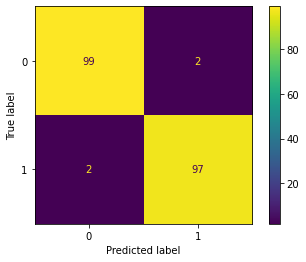

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [92]:
def displayConfusionMatrix(cm, classes=False):
    import itertools

    figsize = (10, 10)

    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    n_classes = cm.shape[0]

    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    ax.set(
        title='Confusion Matrix',
        xlabel='Predicted Labels',
        ylabel='True Labels',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels,
        )

    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    threshold = (cm.max() + cm.min()) / 2.0

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)', 
        horizontalalignment='center', 
        color='white' if cm[i, j] > threshold else 'black',
        size=15)

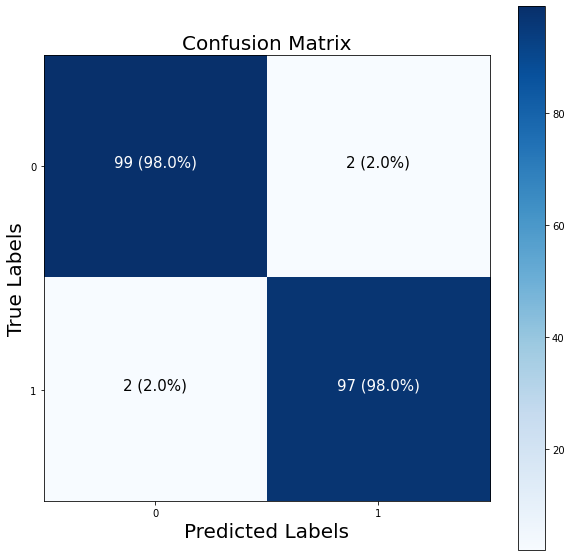

In [94]:
displayConfusionMatrix(cm)